In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [83]:
print('Ingresa el número de meses del proyecto: ')
num_meses = int(input())


print('\nIngresa el número máximo de dias/hombre en la fase de Inicio: ')
d_in = int(input())
print('Ingresa el número máximo de dias/hombre en la fase de Planeación: ')
d_pl = int(input())
print('Ingresa el número máximo de dias/hombre en la fase de Desarrollo y Monitoreo: ')
d_dym = int(input())
print('Ingresa el número máximo de dias/hombre en la fase de Implementación: ')
d_im = int(input())
print('Ingresa el número máximo de dias/hombre en la fase de Cierre: ')
d_ci = int(input())

print('\nIngresa el porcentaje (en decimales) de la fase de Inicio: ')
p_in = float(input())
print('Ingresa el porcentaje (en decimales) de la fase de Planeación: ')
p_pl = float(input())
print('Ingresa el porcentaje (en decimales) de la fase de Desarrollo y Monitoreo: ')
p_dym = float(input())
print('Ingresa el porcentaje (en decimales) de la fase de Implementación: ')
p_im = float(input())
print('Ingresa el porcentaje (en decimales) de la fase de Cierre: ')
p_ci = float(input())


Ingresa el número de meses del proyecto: 
20

Ingresa el número máximo de dias/hombre en la fase de Inicio: 
13
Ingresa el número máximo de dias/hombre en la fase de Planeación: 
17
Ingresa el número máximo de dias/hombre en la fase de Desarrollo y Monitoreo: 
10
Ingresa el número máximo de dias/hombre en la fase de Implementación: 
17
Ingresa el número máximo de dias/hombre en la fase de Cierre: 
5

Ingresa el porcentaje (en decimales) de la fase de Inicio: 
0.05
Ingresa el porcentaje (en decimales) de la fase de Planeación: 
0.1
Ingresa el porcentaje (en decimales) de la fase de Desarrollo y Monitoreo: 
0.65
Ingresa el porcentaje (en decimales) de la fase de Implementación: 
0.1
Ingresa el porcentaje (en decimales) de la fase de Cierre: 
0.1


In [84]:
l_in = num_meses*p_in
l_pl = num_meses*p_pl
l_dym = num_meses*p_dym
l_im = num_meses*p_im
l_ci = num_meses*p_ci

In [85]:
in_list = []
for i in range(int(l_in)):
    in_list.append(int(d_in))

pl_list = []
for i in range(int(l_pl)):
    pl_list.append(int(d_pl))

dym_list = []
for i in range(int(l_dym)):
    dym_list.append(int(d_dym))
dym_list[0] = int((d_pl + d_dym)/2)
dym_list[-1] = int((d_im + d_dym)/2)

im_list = []
for i in range(int(l_im)):
    im_list.append(int(d_im))

ci_list = []
for i in range(int(l_ci)):
    ci_list.append(int(d_ci))

y = in_list + pl_list + dym_list + im_list + ci_list
x = list(np.arange(0, len(y))+1)

df = pd.DataFrame({'meses': x , 'dias hombre': y })
print(df)

    meses  dias hombre
0       1           13
1       2           17
2       3           17
3       4           13
4       5           10
5       6           10
6       7           10
7       8           10
8       9           10
9      10           10
10     11           10
11     12           10
12     13           10
13     14           10
14     15           10
15     16           13
16     17           17
17     18           17
18     19            5
19     20            5


In [86]:
from scipy.optimize import curve_fit
def func(x,a,b,c,d,e,f,g):
    return(a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g)

popt, pcov = curve_fit(func, x, y)

print('Ecuación de sexto grado: \n' + str(popt))

y_modelo = []

for xi in x:
    yi = func(xi, *popt)
    y_modelo.append(yi)

df_modelo = pd.DataFrame({'meses': x , 'dias hombre': y_modelo })
print('\n' + str(df_modelo))  

Ecuación de sexto grado: 
[-5.64553736e-05  3.47268222e-03 -8.38348598e-02  9.98378692e-01
 -5.91929595e+00  1.46858768e+01  3.89548703e+00]

    meses  dias hombre
0       1    13.580028
1       2    16.343241
2       3    15.647761
3       4    13.689557
4       5    11.713038
5       6    10.285508
6       7     9.530968
7       8     9.323279
8       9     9.438670
9      10     9.667602
10     11     9.885985
11     12    10.085738
12     13    10.364719
13     14    10.875986
14     15    11.736428
15     16    12.894736
16     17    13.958732
17     18    13.982052
18     19    11.210172
19     20     2.785799


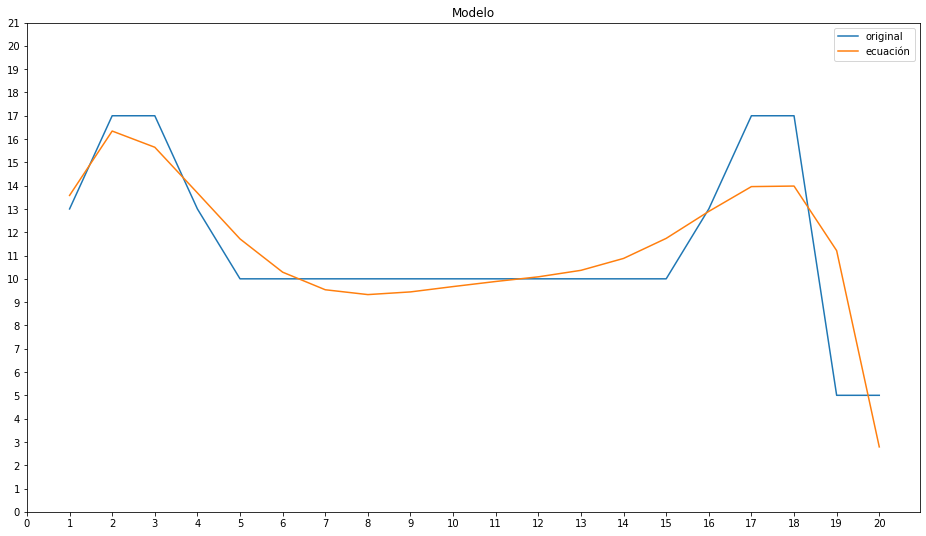

In [87]:
plt.figure(figsize=(16, 9))  
plt.plot(x, y)
plt.plot(x, y_modelo)
plt.legend(['original', 'ecuación'])
plt.title('Modelo')
ax = plt.gca()
ax.set_ylim([0, d_pl +4])
ax.set_xticks(range(0,num_meses+1))
ax.set_yticks(range(0, d_pl+5))